In [1]:
import pandas as pd

# train.csvファイルをPandasで読み込み、データフレームに変換
df = pd.read_csv('data/train.csv')


In [2]:
df.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown


In [3]:
# 欠損値の確認
missing_values = df.isnull().sum()
print(missing_values)

# 欠損値がある場合はドロップ
if missing_values.any():
    df = df.dropna()

index                0
genre                0
popularity           0
duration_ms          0
acousticness         0
positiveness        10
danceability         8
loudness             0
energy               0
liveness             3
speechiness          8
instrumentalness     1
tempo                0
region               0
dtype: int64


In [4]:
# 欠損値の再度確認
missing_values = df.isnull().sum()
print(missing_values)

index               0
genre               0
popularity          0
duration_ms         0
acousticness        0
positiveness        0
danceability        0
loudness            0
energy              0
liveness            0
speechiness         0
instrumentalness    0
tempo               0
region              0
dtype: int64


In [5]:
# 'tempo'と'region'列をone-hotエンコーディングで数値に変換
df = pd.get_dummies(df, columns=['tempo', 'region'])

# 変換後のデータフレームを表示
df.head()



,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,...,region_region_L,region_region_M,region_region_N,region_region_O,region_region_P,region_region_Q,region_region_R,region_region_S,region_region_T,region_unknown
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,...,False,False,False,False,False,False,False,False,False,False
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,...,False,False,False,False,False,False,False,False,False,False
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,...,False,False,False,False,False,False,False,False,False,False
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,...,False,False,False,False,False,False,False,False,False,False
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,...,False,False,False,False,False,False,False,False,False,True


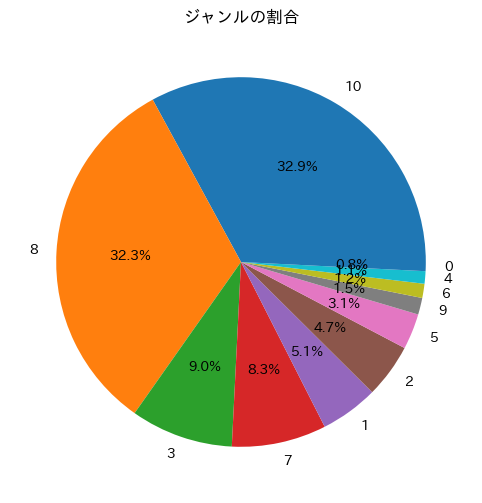

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# ジャンルの数をカウント
genre_counts = df['genre'].value_counts()

# ジャンルの割合を可視化
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('ジャンルの割合')
plt.ylabel('')
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4036 entries, 0 to 4045
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             4036 non-null   int64  
 1   genre             4036 non-null   int64  
 2   popularity        4036 non-null   int64  
 3   duration_ms       4036 non-null   int64  
 4   acousticness      4036 non-null   float64
 5   positiveness      4036 non-null   float64
 6   danceability      4036 non-null   float64
 7   loudness          4036 non-null   float64
 8   energy            4036 non-null   float64
 9   liveness          4036 non-null   float64
 10  speechiness       4036 non-null   float64
 11  instrumentalness  4036 non-null   float64
 12  tempo_0-40        4036 non-null   bool   
 13  tempo_121-152     4036 non-null   bool   
 14  tempo_153-176     4036 non-null   bool   
 15  tempo_177-192     4036 non-null   bool   
 16  tempo_193-208     4036 non-null   bool   
 17  

In [8]:
from sklearn.preprocessing import StandardScaler

# genreカラム以外を抽出
features = df.drop('genre', axis=1)

# StandardScalerを使用して正規化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 正規化されたデータをデータフレームに変換
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# genreカラムを再度追加
scaled_df['genre'] = df['genre'].values

# 正規化されたデータフレームを表示
scaled_df.head()


,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,...,region_region_M,region_region_N,region_region_O,region_region_P,region_region_Q,region_region_R,region_region_S,region_region_T,region_unknown,genre
0,-1.731532,-1.861592,-0.491184,-0.970378,-1.363641,-2.001432,1.432260,1.445382,0.629040,2.292238,...,-0.027274,-0.104986,-0.188156,-0.30573,-0.094868,-0.112,-0.120748,-0.209698,-0.317691,10
1,-1.730676,1.726905,0.778264,-1.018063,-0.522328,0.315499,0.531498,1.348121,-0.461465,-0.444247,...,-0.027274,-0.104986,-0.188156,-0.30573,-0.094868,-0.112,-0.120748,-0.209698,-0.317691,8
2,-1.729821,0.118269,-0.536916,0.623328,-0.883055,-0.296289,-0.380958,-0.817852,-0.312011,2.040254,...,-0.027274,-0.104986,-0.188156,-0.30573,-0.094868,-0.112,-0.120748,-0.209698,-0.317691,3
3,-1.728965,0.242010,0.690785,-0.750789,-0.971303,-0.935012,0.644093,1.319682,0.715523,0.335959,...,-0.027274,-0.104986,-0.188156,-0.30573,-0.094868,-0.112,-0.120748,-0.209698,-0.317691,10
4,-1.728109,0.984457,0.410132,-0.646704,1.393084,2.060044,0.928196,0.230132,-0.619369,0.285817,...,-0.027274,-0.104986,-0.188156,-0.30573,-0.094868,-0.112,-0.120748,-0.209698,3.147715,3


In [9]:
from sklearn.model_selection import train_test_split

# 特徴量とターゲット変数を定義
X = scaled_df.drop('genre', axis=1)
y = scaled_df['genre']

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 分割後のデータの形状を表示
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3228, 44)
X_test shape: (808, 44)
y_train shape: (3228,)
y_test shape: (808,)


In [14]:
import xgboost as xgb
import optuna
from sklearn.metrics import f1_score
import numpy as np

# Optunaによるハイパーパラメータのチューニング
def objective(trial):
    param = {
        'objective': 'multi:softprob',
        'num_class': 11,
        'eval_metric': 'mlogloss',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    gbm = xgb.train(param, dtrain, num_boost_round=100)
    
    preds = gbm.predict(dtest)
    pred_labels = [np.argmax(line) for line in preds]
    f1 = f1_score(y_test, pred_labels, average='weighted')
    
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 最適なハイパーパラメータを表示
print("Best trial:")
trial = study.best_trial
print(f"  F1 Score: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# 最適なハイパーパラメータでモデルを再度トレーニング
best_params = trial.params
best_params['objective'] = 'multi:softprob'
best_params['num_class'] = 11
best_params['eval_metric'] = 'mlogloss'

dtrain = xgb.DMatrix(X_train, label=y_train)
gbm = xgb.train(best_params, dtrain, num_boost_round=100)

# テストセットでの予測と精度の表示
dtest = xgb.DMatrix(X_test)
preds = gbm.predict(dtest)
pred_labels = [np.argmax(line) for line in preds]
f1 = f1_score(y_test, pred_labels, average='weighted')
print(f"Test F1 Score: {f1}")


[I 2024-07-06 11:35:21,186] A new study created in memory with name: no-name-4283a070-b5ae-4afb-94af-c72bf48edb06
C:\Users\yoshi\AppData\Local\Temp\ipykernel_97308\949879332.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\yoshi\AppData\Local\Temp\ipykernel_97308\949879332.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\yoshi\AppData\Local\Temp\ipykernel_97308\949879332.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

Best trial:
  F1 Score: 0.6380701649512528
  Params: 
    learning_rate: 0.09752478504732759
    max_depth: 6
    subsample: 0.9523897261306249
    colsample_bytree: 0.845526084531012
    min_child_weight: 1
Test F1 Score: 0.6380701649512528


In [17]:
# test.csvを読み込む
test_df = pd.read_csv('data/test.csv')

# カテゴリ変数のエンコーディング
test_df = pd.get_dummies(test_df, columns=['tempo', 'region'])

# X_trainとtest_dfを比較して、存在しないカラムを作成し、0を代入
for col in X_train.columns:
    if col not in test_df.columns:
        test_df[col] = 0

# カラムの順番をX_trainに合わせる
test_df = test_df[X_train.columns]

# 予測データを正規化
scaled_test_df = scaler.transform(test_df)

# DMatrixに変換
dtest = xgb.DMatrix(scaled_test_df, feature_names=X_train.columns.tolist())

# モデルを用いて予測を行う
preds = gbm.predict(dtest)
pred_labels = [np.argmax(line) for line in preds]

# 結果をデータフレームにする
result_df = pd.DataFrame({'Index': test_df['index'], 'Prediction': pred_labels})

# 予測結果を表示
print("予測結果:")
print(result_df)




予測結果:
      Index  Prediction
0      4046           8
1      4047          10
2      4048           8
3      4049          10
4      4050           8
...     ...         ...
4041   8087          10
4042   8088           8
4043   8089          10
4044   8090           8
4045   8091           8

[4046 rows x 2 columns]


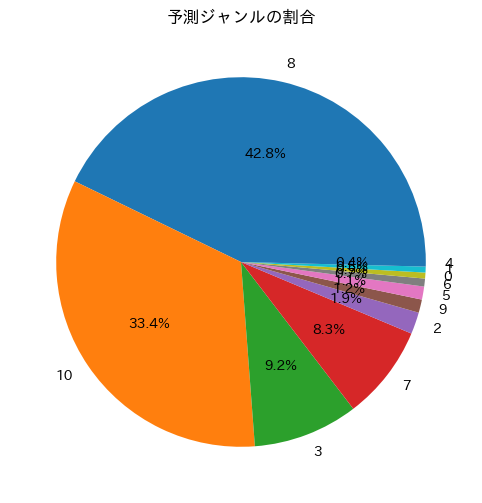

In [18]:
# 予測データのジャンルの割合を可視化
plt.figure(figsize=(10, 6))
result_df['Prediction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('予測ジャンルの割合')
plt.ylabel('')
plt.show()


In [13]:
# CSVファイルに出力（インデックスなし、ヘッダーなし）
result_df.to_csv('data/submit.csv', index=False, header=False)
